In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.duplicated().sum()

240

In [7]:
data.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
for col in data:
    data[col].unique()
    print(data[col].unique())

[ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
[0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.635 0.82  0.48  1.    0.21  0.35  0.975 0.26  0.87  0.18
 0.27  

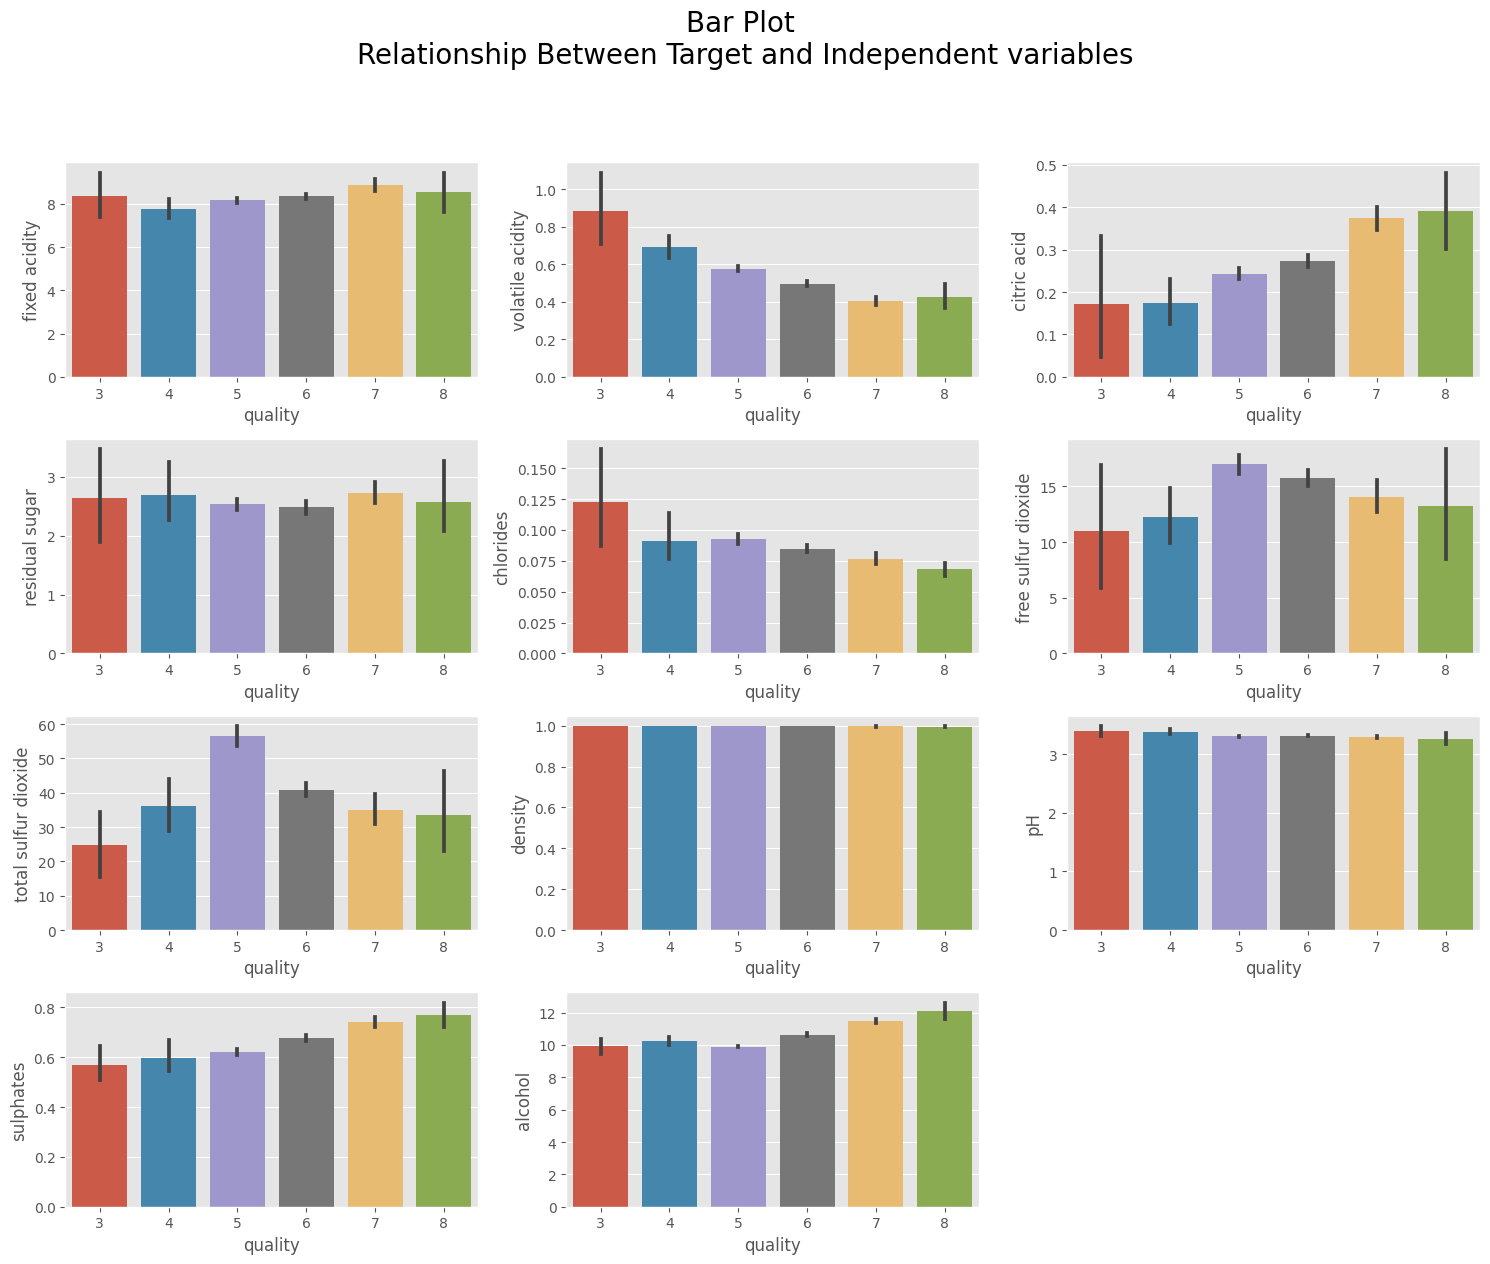

In [10]:
numeric_col=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
plt.style.use('ggplot')
plt.figure(figsize=(15, 12))
plt.suptitle('Bar Plot \nRelationship Between Target and Independent variables'
, fontsize=20, alpha=1, y=1.05)
for i in range(0, len(numeric_col)):
    plt.subplot(4,3,i+1)
    sns.barplot(x='quality',
              y=numeric_col[i],
              data=data)#data=data(df)
    plt.tight_layout()


In [11]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [12]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value,abs-rmv ngtv value,alwys use ngvt value so use abs
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(data, 0.8)
len(set(corr_features))


0

In [13]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [14]:
data['quality'] = data['quality'].apply(lambda x:1 if x>=7 else 0)

In [15]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [16]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

Text(0.5, 1.0, 'Class Distributions \n 0: bad quality wine || 1: good quality wine')

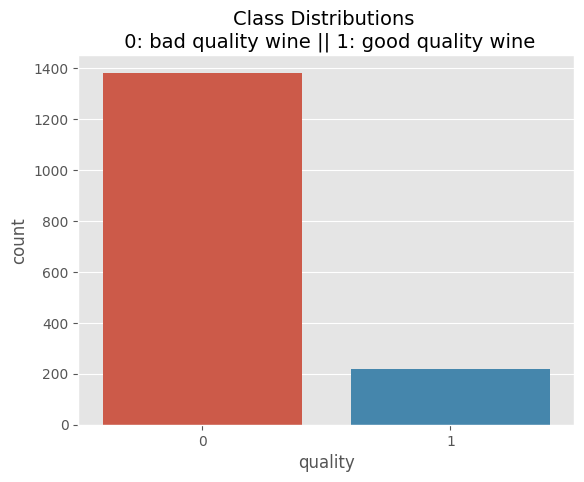

In [17]:
sns.countplot(data['quality'])
#sns.countplot('Classes', data=df, palette="tab10")
plt.title('Class Distributions \n 0: bad quality wine || 1: good quality wine', fontsize=14)

### From above Graph we show data is imbalanced

In [18]:
X = data.drop('quality',axis=1)
y=data['quality']

In [19]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [20]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,
                                                    random_state=40)
X_train.shape, X_test.shape

((1199, 11), (400, 11))

In [22]:
## Standardize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [23]:
X_train

array([[-1.68413659,  1.17990998, -1.38465703, ...,  4.48463955,
        -0.38804345,  1.9984165 ],
       [-0.46606072, -0.82389205,  1.52798118, ...,  0.29024651,
        -0.62618246,  0.94711059],
       [-1.10410046,  0.56763713, -0.31157979, ...,  1.70988723,
         0.02869982, -0.58206164],
       ...,
       [-0.58206795,  0.67895947, -1.38465703, ...,  0.48383388,
        -1.10246048, -0.39091511],
       [-0.29204988,  0.01102546,  0.3016072 , ..., -0.09692823,
        -0.32850869, -0.86878143],
       [ 0.40399347,  0.40065363,  0.09721153, ...,  0.16118826,
        -0.50711295, -0.39091511]])

In [24]:
X_test

array([[ 1.04203321, -0.87955322,  0.35270611, ..., -0.93580684,
        -0.03083493,  0.18252448],
       [-1.56812937, -1.21352022,  0.50600286, ...,  0.03213001,
        -0.4475782 , -1.15550123],
       [ 0.63600792, -0.15595804,  0.35270611, ..., -0.16145736,
        -0.80478672,  0.27809774],
       ...,
       [ 0.34598986, -0.71256972,  0.25050828, ...,  0.41930476,
         0.6835821 ,  0.08695121],
       [-0.3500535 , -0.21161921, -0.05608522, ...,  0.48383388,
        -0.09036968, -0.77320817],
       [-0.3500535 ,  0.06668663, -0.05608522, ..., -0.35504473,
        -0.38804345, -0.6776349 ]])

## Handle Imbalanced data we used undersampling by SMOTE Technique

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [27]:
y_res.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

### AFter handle imbalanced data we repeat step of split train and test data by passing resample variable X_res,y_res. 

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.25,
                                                    random_state=40)
X_train.shape, X_test.shape

((2073, 11), (691, 11))

In [29]:
## Standardize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [30]:
X_train

array([[ 0.17796678, -2.07444569,  0.67211259, ...,  0.75880142,
         0.42127867,  0.93358484],
       [-1.04675057, -1.14695158, -0.20183352, ..., -0.26094613,
        -1.99655588,  0.75195701],
       [ 1.10408039,  0.36727813,  0.32004321, ..., -0.78210379,
         0.53809467,  1.03263758],
       ...,
       [-0.82259376, -0.65603324,  0.10565737, ...,  0.70186354,
        -0.00378133,  0.31590644],
       [-0.33715935, -0.87704593,  0.23246485, ..., -0.19296296,
        -0.85046907,  0.47417652],
       [-0.76840572, -0.62523614,  0.00380086, ..., -0.46489564,
         0.22523803,  0.38870134]])

In [31]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(X_train,y_train)

SVC()

In [34]:
from sklearn.metrics import accuracy_score
svm_pred = classifier.predict(X_test)
accuracy_score(y_test,svm_pred)

0.8509406657018813

In [36]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_test,svm_pred)

0.816

In [39]:
recall_score(y_test,svm_pred)

0.9

In [40]:
f1_score(y_test,svm_pred)

0.8559440559440559

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
Logistic_Regression = LogisticRegression()

In [42]:
Logistic_Regression.fit(X_train,y_train)

LogisticRegression()

In [43]:
Logistic_Regression_Prediction = Logistic_Regression.predict(X_test)
Logistic_Regression_Prediction

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,

In [44]:
Score = accuracy_score(y_test,Logistic_Regression_Prediction)
Classification_Report = classification_report(y_test,Logistic_Regression_Prediction)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Logistic Regression
Accuracy Score value: 0.8119
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       351
           1       0.79      0.84      0.82       340

    accuracy                           0.81       691
   macro avg       0.81      0.81      0.81       691
weighted avg       0.81      0.81      0.81       691



In [ ]:
df2 = pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [ ]:
df2

#TASK

1. YOU HAVE TO INCREASE THE ACCURACY OF THE SVC MODEL(WINEQUALITY DATASET)
2. Try HYPERPARAMETER TUNING(GRIDSEARCH cv https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
3. YOU HVAE TO IMPLEMENT SVR(ADDIMISSOIN_PREDICTION)
https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv